# Accessing & Indexing Argo Data

In [1]:
#All the imports I utalized to allow any code to run across any of my notebooks
import xarray as xr
xr.set_options(display_style="html", display_expand_attrs=False);
from matplotlib import pyplot as plt
plt.style.use('default')
import cartopy
import cartopy.crs as ccrs
import argopy
import numpy as np
import os, shutil
import pandas as pd
from pathlib import Path
import seawater as sw

## Accessing Argo Data

### Option 1 - Using ArgoDataFetcher (good for graphs)

This method will allow you to visual and sort through Argo float data that fits a certain criteria. I did find that there are issues of inconsistency if you want to sort through all the Argo floats, active and inactive though. Most of the time it gives you all active floats, but excludes inactive, and sometimes you will get different errors that are fixed with running the cell individually, so for determining what Argo floats match your parameters this isn't the best method. But I would recommend using this strategy for graphs after determining matching Argo floats from ArgoIndexFetcher!

In [2]:
#Make sure to import the DataFetcher itself, and then define argo_loader; I normally add this to the beginning of my notebooks with imports
from argopy import DataFetcher as ArgoDataFetcher
argo_loader = ArgoDataFetcher(src='erddap', parallel=True) #Chose between 'argovis' and 'erddap' for your data sourcing!
argo_loader

<datafetcher.erddap> 'No access point initialised'
Available access points: float, profile, region
Performances: cache=False, parallel=True
User mode: standard
Dataset: phy

The other big thing to consider is your source of data. I mainly used src='erddap' for my data because it was in a more raw form of the data from Argo floats and didn't have as many automatic restrictions like q1 quality control, plus I have run into the least amount of errors with it. But src='argovis' could work just as well depending on your purposes, especially if errdap crashes. Another potential source, specifically for ArgoIndexFetcher (considering argovis does not work with IndexFetcher) is also 'gdac' which I included in this notebook only because errdap was recieving maintainence at the time of upload.

#### You can ask for Argo floats that are limited by the following conditions: 
- Latitude, Longitude, Depth
- Time, but would not recommend as there are issues with that variable
- Float WMO ID Number

In [3]:
#Limiting Argo Floats by Latitude, Longitude, Depth
argo1 = argo_loader.region([-147, -138, 24, 36, 0, 10000]).load().data #(max longitude, min longitude, min latitude, max latitude, min depth, max depth)
argo1 #This is to visualize the information you found in a table format!

<xarray.Dataset>
Dimensions:          (N_POINTS: 2873389)
Coordinates:
  * N_POINTS         (N_POINTS) int32 0 1 2 3 ... 2873386 2873387 2873388
    LATITUDE         (N_POINTS) float64 35.89 35.89 35.89 ... 28.31 28.31 28.31
    LONGITUDE        (N_POINTS) float64 -144.8 -144.8 -144.8 ... -140.4 -140.4
    TIME             (N_POINTS) datetime64[ns] 2002-07-10T15:23:00 ... 2023-0...
Data variables: (12/15)
    CYCLE_NUMBER     (N_POINTS) int32 14 14 14 14 14 14 ... 223 223 223 223 223
    DATA_MODE        (N_POINTS) <U1 'D' 'D' 'D' 'D' 'D' ... 'A' 'A' 'A' 'A' 'A'
    DIRECTION        (N_POINTS) <U1 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER  (N_POINTS) int32 4900123 4900123 ... 4902951 4902951
    POSITION_QC      (N_POINTS) int32 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
    PRES             (N_POINTS) float32 1.545e+03 1.595e+03 ... 998.0 1e+03
    ...               ...
    PSAL_ERROR       (N_POINTS) float32 0.01 0.01 0.01 0.01 ... nan nan nan nan
    PSAL_QC          (N_POINTS) int32 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
    TEMP             (N_POINTS) float32 2.543 2.485 2.404 ... 3.633 3.627 3.623
    TEMP_ERROR       (N_POINTS) float32 0.002 0.002 0.002 0.002 ... nan nan nan
    TEMP_QC          (N_POINTS) int32 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
    TIME_QC          (N_POINTS) int32 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
Attributes: (8)

In [4]:
#Limited Argo Floats by Float WMO ID Number
argo2 = argo_loader.float(5903385).load().data #You can also create a list of floats by replacing 5903385 with [5903385, 5903385]
argo2

<xarray.Dataset>
Dimensions:          (N_POINTS: 144486)
Coordinates:
  * N_POINTS         (N_POINTS) int32 0 1 2 3 4 ... 144482 144483 144484 144485
    LATITUDE         (N_POINTS) float64 22.7 22.7 22.7 ... 25.07 25.07 25.07
    LONGITUDE        (N_POINTS) float64 -158.1 -158.1 -158.1 ... -146.6 -146.6
    TIME             (N_POINTS) datetime64[ns] 2011-01-10T18:22:15 ... 2015-0...
Data variables: (12/15)
    CYCLE_NUMBER     (N_POINTS) int32 1 1 1 1 1 1 1 ... 299 299 299 299 299 299
    DATA_MODE        (N_POINTS) <U1 'D' 'D' 'D' 'D' 'D' ... 'D' 'D' 'D' 'D' 'D'
    DIRECTION        (N_POINTS) <U1 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER  (N_POINTS) int32 5903385 5903385 ... 5903385 5903385
    POSITION_QC      (N_POINTS) int32 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
    PRES             (N_POINTS) float32 4.37 6.07 7.97 ... 972.0 974.0 998.5
    ...               ...
    PSAL_ERROR       (N_POINTS) float32 0.01 0.01 0.01 0.01 ... 0.01 0.01 0.01
    PSAL_QC          (N_POINTS) int32 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
    TEMP             (N_POINTS) float32 23.76 23.76 23.76 ... 4.071 4.069 3.989
    TEMP_ERROR       (N_POINTS) float32 0.002 0.002 0.002 ... 0.002 0.002 0.002
    TEMP_QC          (N_POINTS) int32 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
    TIME_QC          (N_POINTS) int32 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
Attributes: (8)

In [5]:
#Limited Argo Floats by Time in addition to Latitude, Longitude, and Depth
argo3 = argo_loader.region([-75, -45, 20, 30, 0, 10, '1999-01', '2023-08']).load().data #(max longitude, min longitude, min latitude, max latitude, min depth, max depth, max time, min time), time is in year, month, day.
argo3

<xarray.Dataset>
Dimensions:          (N_POINTS: 270)
Coordinates:
  * N_POINTS         (N_POINTS) int32 0 1 2 3 4 5 6 ... 264 265 266 267 268 269
    LATITUDE         (N_POINTS) float64 20.86 27.96 20.54 ... 21.8 26.84 26.84
    LONGITUDE        (N_POINTS) float64 -67.91 -69.61 -68.25 ... -74.71 -74.71
    TIME             (N_POINTS) datetime64[ns] 2001-06-16T23:53:46 ... 2007-0...
Data variables: (12/15)
    CYCLE_NUMBER     (N_POINTS) int32 2 3 3 4 4 5 5 6 ... 42 42 138 40 40 31 31
    DATA_MODE        (N_POINTS) <U1 'D' 'D' 'D' 'D' 'D' ... 'D' 'D' 'D' 'D' 'D'
    DIRECTION        (N_POINTS) <U1 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER  (N_POINTS) int32 4900147 4900151 ... 4900792 4900792
    POSITION_QC      (N_POINTS) int32 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
    PRES             (N_POINTS) float32 10.0 10.0 10.0 10.0 ... 10.0 5.0 10.0
    ...               ...
    PSAL_ERROR       (N_POINTS) float32 0.01118 0.01289 ... 0.01118 0.01118
    PSAL_QC          (N_POINTS) int32 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
    TEMP             (N_POINTS) float32 28.14 27.9 28.45 ... 29.03 29.45 29.45
    TEMP_ERROR       (N_POINTS) float32 0.002 0.002 0.002 ... 0.002 0.002 0.002
    TEMP_QC          (N_POINTS) int32 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
    TIME_QC          (N_POINTS) int32 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1
Attributes: (8)

#### This method of accessing Argo data has some built in functions and graphs you can utalize and build off too.

Different Graphs that I explored during this project will each get their own notebook, but here is the overall list for your convienence:

- Built-In Trajectory Graphs on a World Map
- Trajectory Graphs Mapped Against Topographical Map
- Trajectory Graphs color-coded by year launched for each profile!
- CTD graphs w/ Temperature and Salinity Mapped Against Depth
- T/S Diagrams w/ density color bars calculated from seawater Python package

#### Failed Attempt at Indexing

At first I tried to sort through Argo data that fit the following restrictions of EM-APEX's overall bounding box, and then list the floats satisfying those conditions using the world map trajectory graph like the following:

EM-APEX Conditions - Overall Bounding Box:
- lon max, lon min, lat min, lat max, depth min, depth max
- -146.321753, -139.39713, 25.633673, 35.469333, 0, 10000

(<Figure size 900x540 with 1 Axes>,
 <GeoAxes: xlabel='longitude', ylabel='latitude'>)

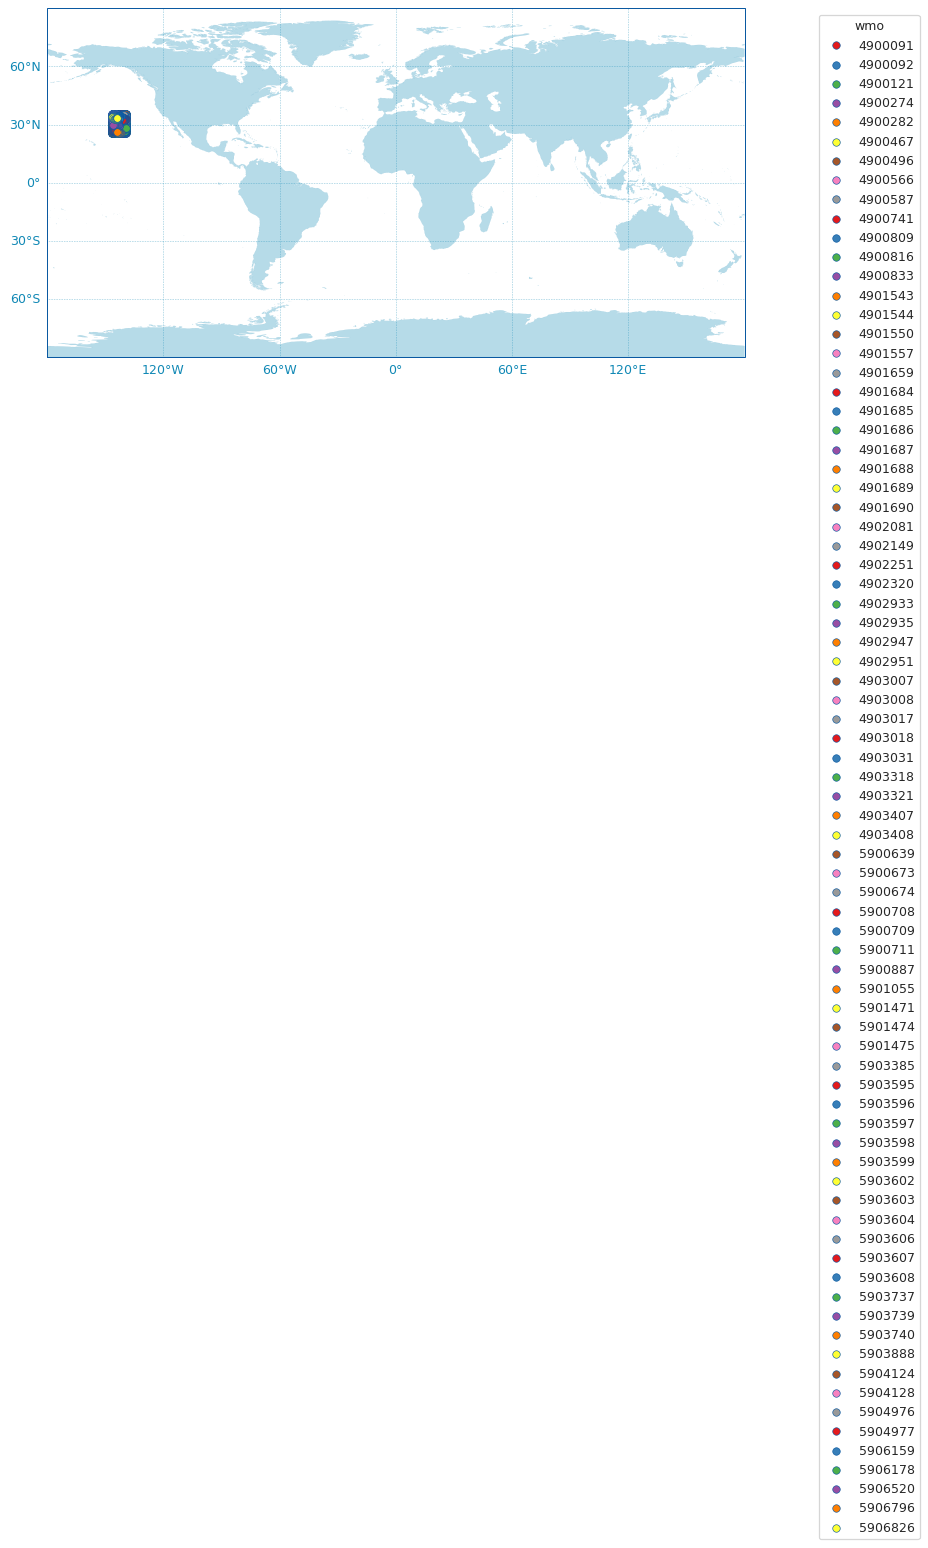

In [11]:
argo1 = argo_loader.region([-146.321753, -139.39713, 25.633673, 35.469333, 0, 10000]).load().data #(max longitude, min longitude, min latitude, max latitude, min depth, max depth)
#argo1.plot('trajectory', set_global=True) #This is to visualize the information you found in a table format!
argo_loader.plot('trajectory', set_global=True)

However, this process for the EM-APEX SMILE, NISKINE, and DIMES experiments was time consuming and unreliable, and so I used the IndexFetcher instead!

### Option 2 - Using ArgoIndexFetcher

This method will allow you to visual and sort through Argo float data that fits a certain criteria, but without the issues the DataIndexFetcher was running into. Since I was focusing on the EM-APEX SMILE Experiment, I chose to have four bounding boxes to investigate in and outside of the year 2017!

Bounding Boxes: (lat min, lat max, lon min, lon max)
- Overall = 25.633673, 35.469333, -146.321753, -139.39713
- Region #1 = 25.5, 28.0, -146.322, -145
- Region #2 = 28.0, 30.6, -146.322, -145
- Region #3 = 34.0, 35.469333, -140.5, -139.39713

#### First Import the IndexFetcher!

In [12]:
from argopy import IndexFetcher as ArgoIndexFetcher

#### Then do the Indexing!

In [13]:
#Overall Region - Argo floats that intersect EM-APEX SMILE experiment across all time
idx1 = ArgoIndexFetcher(src='erddap').region([-146.321753, -139.39713, 25.633673, 35.469333, '1999-01-01', '2023-01-01']).load()
idx1.index

,file,date,longitude,latitude,ocean,profiler_code,institution_code,date_update,wmo,institution,profiler
0,aoml/4900091/profiles/D4900091_001.nc,2002-07-30 06:57:32,-139.865,31.747,P,846,AO,2020-05-06 14:47:23,4900091,"AOML, USA","Webb Research, Seabird sensor"
1,aoml/4900092/profiles/D4900092_001.nc,2002-07-30 19:05:15,-143.786,29.850,P,846,AO,2015-03-13 14:15:24,4900092,"AOML, USA","Webb Research, Seabird sensor"
2,aoml/4900091/profiles/D4900091_002.nc,2002-08-09 19:46:53,-140.331,31.780,P,846,AO,2015-03-09 16:12:27,4900091,"AOML, USA","Webb Research, Seabird sensor"
3,aoml/4900092/profiles/D4900092_002.nc,2002-08-10 07:40:46,-144.083,30.070,P,846,AO,2015-03-13 14:15:24,4900092,"AOML, USA","Webb Research, Seabird sensor"
4,aoml/4900091/profiles/D4900091_003.nc,2002-08-20 08:49:11,-140.624,31.801,P,846,AO,2015-03-09 16:12:28,4900091,"AOML, USA","Webb Research, Seabird sensor"
...,...,...,...,...,...,...,...,...,...,...,...
6693,aoml/5904977/profiles/R5904977_214.nc,2022-12-27 05:30:52,-142.891,26.546,P,863,AO,2022-12-27 06:00:53,5904977,"AOML, USA",Navis-A Float
6694,aoml/4903018/profiles/D4903018_135.nc,2022-12-27 23:28:58,-146.034,32.072,P,853,AO,2023-01-24 18:38:08,4903018,"AOML, USA","Solo2, Seabird conductivity sensor"
6695,aoml/5906520/profiles/D5906520_019.nc,2022-12-28 18:41:55,-143.605,30.542,P,846,AO,2023-01-30 16:04:41,5906520,"AOML, USA","Webb Research, Seabird sensor"
6696,aoml/4902947/profiles/R4902947_198.nc,2022-12-29 06:31:22,-143.928,27.566,P,863,AO,2023-02-06 19:02:25,4902947,"AOML, USA",Navis-A Float


In [14]:
#This code tells you what floats agree with the limited parameters!
SMILE_floats_D1 = idx1.index.wmo #indexes into the column, wmo or float ID's
SMILE_floats_ND1 = SMILE_floats_D1.drop_duplicates() #gets rid of duplicates
SMILE_floats_ND1 #Tells you what these floats are

0       4900091
1       4900092
123     4900566
124     5900639
167     5900711
         ...   
6436    4903407
6490    4902320
6503    4903408
6543    5906520
6640    5906826
Name: wmo, Length: 94, dtype: int64

In [15]:
len(SMILE_floats_ND1) #Tells you how many floats matched!

94

In [16]:
#Overall Region - Argo floats that intersect EM-APEX SMILE experiment across 2017!
idx2 = ArgoIndexFetcher(src='erddap').region([-146.321753, -139.39713, 25.633673, 35.469333, '2017-01-01', '2017-12-31']).load()
idx2.index

,file,date,longitude,latitude,ocean,profiler_code,institution_code,date_update,wmo,institution,profiler
0,aoml/5903603/profiles/D5903603_187.nc,2017-01-02 02:38:10,-141.525,30.951,P,846,AO,2020-01-27 10:19:07,5903603,"AOML, USA","Webb Research, Seabird sensor"
1,aoml/4901557/profiles/D4901557_127.nc,2017-01-02 07:55:35,-142.463,33.126,P,863,AO,2019-07-11 11:12:58,4901557,"AOML, USA",Navis-A Float
2,aoml/5903607/profiles/D5903607_187.nc,2017-01-02 21:20:52,-143.256,32.992,P,846,AO,2020-01-27 10:23:22,5903607,"AOML, USA","Webb Research, Seabird sensor"
3,aoml/5903602/profiles/D5903602_187.nc,2017-01-03 09:10:08,-140.732,32.171,P,846,AO,2017-12-05 18:23:55,5903602,"AOML, USA","Webb Research, Seabird sensor"
4,aoml/5903599/profiles/D5903599_187.nc,2017-01-04 02:26:52,-143.517,30.359,P,846,AO,2017-12-05 14:13:26,5903599,"AOML, USA","Webb Research, Seabird sensor"
...,...,...,...,...,...,...,...,...,...,...,...
414,aoml/5903603/profiles/D5903603_222.nc,2017-12-23 22:52:49,-143.425,31.853,P,846,AO,2020-01-27 10:19:41,5903603,"AOML, USA","Webb Research, Seabird sensor"
415,aoml/5903607/profiles/D5903607_222.nc,2017-12-24 17:35:14,-143.602,34.010,P,846,AO,2020-01-27 10:24:03,5903607,"AOML, USA","Webb Research, Seabird sensor"
416,aoml/5903602/profiles/D5903602_222.nc,2017-12-25 05:14:50,-140.385,32.344,P,846,AO,2020-01-27 10:18:02,5903602,"AOML, USA","Webb Research, Seabird sensor"
417,aoml/5903599/profiles/D5903599_222.nc,2017-12-25 22:30:40,-140.148,28.180,P,846,AO,2020-01-27 10:15:09,5903599,"AOML, USA","Webb Research, Seabird sensor"


In [17]:
SMILE_floats_D2 = idx2.index.wmo #indexes into the column, wmo or float ID's
SMILE_floats_ND2 = SMILE_floats_D2.drop_duplicates() #gets rid of duplicates
SMILE_floats_ND2 #Tells you what these floats are
len(SMILE_floats_ND2) #Tells you how many floats matched!

20

In [18]:
#Region 1 - Argo floats that intersect EM-APEX SMILE experiment across all time & limited time
idx3 = ArgoIndexFetcher(src='erddap').region([-146.322, -145, 25.5, 28.0, '1999-01-01', '2023-01-01']).load()
idx4 = ArgoIndexFetcher(src='erddap').region([-146.322, -145, 25.5, 28.0, '2017-01-01', '2017-12-31']).load() #MOST INTERESTING

In [19]:
SMILE_floats_D3 = idx3.index.wmo #indexes into the column, wmo or float ID's
SMILE_floats_ND3 = SMILE_floats_D3.drop_duplicates() #gets rid of duplicates
SMILE_floats_ND3 #Tells you what these floats are
len(SMILE_floats_ND3)

19

In [20]:
SMILE_floats_D4 = idx4.index.wmo #indexes into the column, wmo or float ID's
SMILE_floats_ND4 = SMILE_floats_D4.drop_duplicates() #gets rid of duplicates
SMILE_floats_ND4 #Tells you what these floats are

0    5903608
8    5904977
Name: wmo, dtype: int64

In [21]:
len(SMILE_floats_ND4) #Tells you how many floats matched!

2

In [22]:
#Region 2 - Argo floats that intersect EM-APEX SMILE experiment across all time & limited time
idx5 = ArgoIndexFetcher(src='erddap').region([-146.322, -145, 28.0, 30.6, '1999-01-01', '2023-01-01']).load()
idx6 = ArgoIndexFetcher(src='erddap').region([-146.322, -145, 28.0, 30.6, '2017-01-01', '2017-12-31']).load() #MOST INTERESTING

In [23]:
SMILE_floats_D5 = idx5.index.wmo #indexes into the column, wmo or float ID's
SMILE_floats_ND5 = SMILE_floats_D5.drop_duplicates() #gets rid of duplicates
SMILE_floats_ND5 #Tells you what these floats are
len(SMILE_floats_ND5)

22

In [24]:
SMILE_floats_D6 = idx6.index.wmo #indexes into the column, wmo or float ID's
SMILE_floats_ND6 = SMILE_floats_D6.drop_duplicates() #gets rid of duplicates
SMILE_floats_ND6 #Tells you what these floats are

0    5904128
Name: wmo, dtype: int64

In [25]:
len(SMILE_floats_ND6) #Tells you how many floats matched!

1

In [26]:
#Region 3 - Argo floats that intersect EM-APEX SMILE experiment across all time & limited time
34.0, 35.469333, -140.5, -139.39713
idx7 = ArgoIndexFetcher(src='erddap').region([-140.5, -139.39713, 34.0, 35.469333, '1999-01-01', '2023-01-01']).load()
idx8 = ArgoIndexFetcher(src='erddap').region([-140.5, -139.39713, 34.0, 35.469333, '2017-01-01', '2017-12-31']).load() #MOST INTERESTING

In [27]:
SMILE_floats_D7 = idx7.index.wmo #indexes into the column, wmo or float ID's
SMILE_floats_ND7 = SMILE_floats_D7.drop_duplicates() #gets rid of duplicates
SMILE_floats_ND7 #Tells you what these floats are
len(SMILE_floats_ND7)

18

In [28]:
SMILE_floats_D8 = idx8.index.wmo #indexes into the column, wmo or float ID's
SMILE_floats_ND8 = SMILE_floats_D8.drop_duplicates() #gets rid of duplicates
SMILE_floats_ND8 #Tells you what these floats are

0    4900816
2    4902251
Name: wmo, dtype: int64

In [29]:
len(SMILE_floats_ND8)

2

#### Argo Float Matches!

After going through this indexing in the IndexFetcher, I was able to narrow down Argo float matches to Regions 1 and 2 in EM-APEX SMILE data that shared geographical space and time (2017):

Region #1:
5903608, 5904977, 4902947 (2017 isn't in geogrpahical bounds), 4902935 (2017 isn't in geographcial bounds), 5903603 (2017 isn't in geographical bounds)

Region #2:
5904128, 4902149

Region #3:
4900816, 4902251

And now we can move on to the graphs of each of these Argo floats!

### Option 3 - Downloading Argo Files onto your computer

You can also do this if you know what floats you want to focus on, but considering I had a lot of data to work with I did not use this method as much. The Argo Online School resources I mentioned in the .README file have more information about these methods and how Argo data files are organized if you want to try this method out. Good luck, and now on to the graphs!